# Practical 4: Gradient descent

## Preliminary

First import the all libraries

In [1]:
%matplotlib inline
import numpy as np
import numpy.random as rd
import scipy as sc
import matplotlib.pyplot as plt

Make a fake cost for instance:
$$ J(\theta_0, \theta_1) = 5\,\theta_0^2 + \theta_1^4 + \exp (\theta_0 + \theta_1 / 2 ) $$

In [2]:
def cost(th):
    th0 = th[0]
    th1 = th[1]
    return 5 * th0**2 + th1**4 + np.exp(th0 + 0.5 * th1)

In [3]:
th = [.3, .2]
cost(th)

1.9434246976412703

Compute the gradient by hand and enter it as a function

In [4]:
def grad(th):
    th0 = th[0]
    th1 = th[1]
    
    # Each component can be computed indivudually
    dJ_dth0 = 5 * 2 * th0 + np.exp(th0 + 0.5 * th1)
    dJ_dth1 = 4 * th1 ** 3 + 0.5 * np.exp( th0 + 0.5 * th1)
    
    return np.array([dJ_dth0, dJ_dth1])

In [5]:
th = [.3, .2]
grad(th)

array([4.4918247 , 0.77791235])

Plot the cost function in 3d

/var/folders/9d/frqz29_11r30dgr8w7c8xzb80000gn/T/ipykernel_2042/3663580572.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


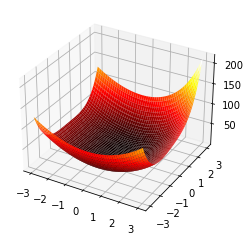

In [6]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')

N = 200
th0 = np.linspace(-3, 3, N)
th1 = np.linspace(-3, 3, N)
TH0, TH1 = np.meshgrid(th0, th1)
ZZ = np.zeros(TH0.shape)
for i in range(N):
    for j in range(N):
        th0_ = TH0[i,j]
        th1_ = TH1[i,j]
        ZZ[i,j] = cost([th0_,th1_])

ax.plot_surface(TH0, TH1, ZZ, cmap='hot')

## Verify your gradient

The gradient is defined for every vector $\mathbf{v}$ as:
$$ \lim\limits_{\delta \rightarrow 0} \frac{f(\mathbf{ \theta } + \delta\,\mathbf{v}) - f(\mathbf{\theta)}}{\delta} = \nabla_\mathbf{\theta} f^T\,\mathbf{v} $$

We take a random vector for v and verify that for small deltas it converges toward the good number.


In [7]:
delta_list = [1e-6, 1e-4, 1e-2, 1]

# Take a random vector
th0 = rd.rand(2)
v = rd.randn(2)

In [8]:
# Initialize a list to store the approximation
approx_list = np.zeros(len(delta_list))
for k_d, delta in enumerate(delta_list):
    df = (cost(th0 + delta * v) - cost(th0)) / delta
    approx_list[k_d] = np.abs(df - grad(th0).dot(v))

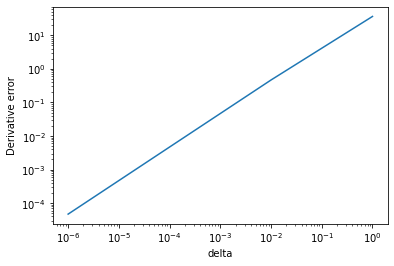

[4.70145046e-05 4.70138485e-03 4.68118163e-01 3.66833127e+01]


In [9]:
plt.plot(delta_list, approx_list)
# plt.scatter(delta_list, approx_list)
plt.loglog()
plt.xlabel('delta')
plt.ylabel('Derivative error')
plt.show()

print(approx_list)

With a wrong gradient the curve will look different (here, the magnitude of the error has a similar order as delta). 
By setting an error on purpose into the gradient, we get...

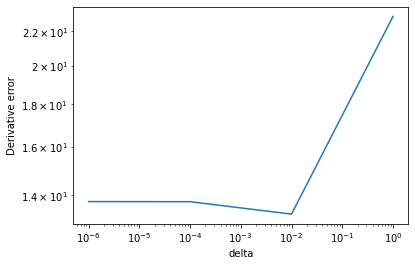

[13.75316378 13.74850941 13.28509263 22.93010191]


In [10]:
def wrong_grad(th):
    th0 = th[0]
    th1 = th[1]
    
    # Each component can be computed indivudually
    dJ_dth0 = 2 * th0 + np.exp(th0 + 0.5 * th1)
    dJ_dth1 = 4 * th1 ** 3 + 0.5 * np.exp( th0 + 0.5 * th1)
    
    return np.array([dJ_dth0, dJ_dth1])

# Initialize a list to store the approximation prevision
approx_list = np.zeros(len(delta_list))
for k_d, delta in enumerate(delta_list):
    df = (cost(th0 + delta * v) - cost(th0)) / delta
    approx_list[k_d] = np.abs(df - wrong_grad(th0).dot(v))
    
plt.plot(delta_list, approx_list)
plt.loglog()
plt.xlabel('delta')
plt.ylabel('Derivative error')
plt.show()

print(approx_list)

# Implement gradient descent

The iteration of gradient descent is performed with the formula:
$$ \theta_j \leftarrow \theta_j - \eta\,\nabla_\theta J_j$$

In [ ]:
def gradient_descent(theta, f, df, n_iter, eta):
    E_list = np.zeros(n_iter)  # List of errors for each step
    for i in range(n_iter):
        # TODO: Implement gradient descent iterations here
        
 
    return theta, E_list

In [17]:
th0 = rd.rand(2)
sol, E_list = gradient_descent(th0, cost, grad, n_iter=100, eta=.1)
print('Minimum found: ', sol)

Minimum found:  [-0.07406306 -0.45238051]


In [18]:
cost(sol), cost(th0)

(0.8099381237684057, 1.631402528863491)

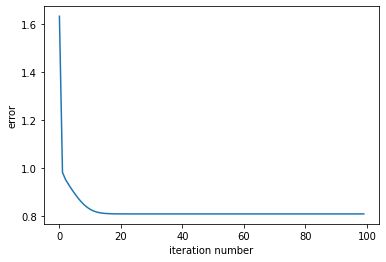

In [19]:
plt.plot(E_list)
plt.xlabel('iteration number')
plt.ylabel('error')
plt.show()

# Using the optimize toolbox from scipy

In [20]:
from scipy.optimize import minimize
th0 = rd.rand(2)
res = minimize(cost, th0, jac=grad, options={'disp': True})
res.x

Optimization terminated successfully.
         Current function value: 0.809938
         Iterations: 7
         Function evaluations: 10
         Gradient evaluations: 10


array([-0.07406307, -0.4523806 ])